In [22]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Marketing-Customer-Value-Analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## Data Analysis and Visualization

In [5]:
# Encode the responses 
df['Engaged'] = df['Response'].apply(lambda x: 0 if x=='No' else 1)

In [8]:
# Calculate engagement rate 
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response']/df.shape[0]* 100.0
)

In [9]:
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [10]:
# Make it easier to read
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


In [11]:
# Exploring the Sales Channels
engagement_by_sales_channel_df = pd.pivot_table(
df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len).fillna(0)

In [13]:
# Rename the columns
engagement_by_sales_channel_df.columns =['Not Engaged', 'Engaged']

In [14]:
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


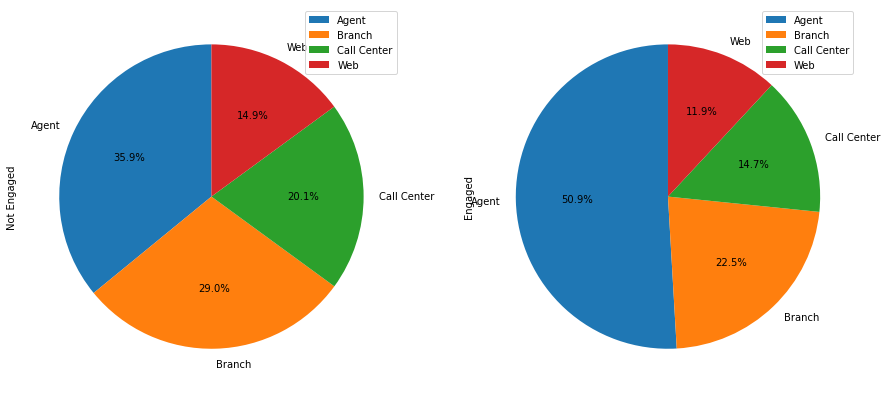

In [23]:
# Visualize the Engagement by Sales Channels
engagement_by_sales_channel_df.plot(
kind='pie',
figsize=(15,7),
startangle=90,
subplots=True,
autopct=lambda x:'%0.1f%%' %x)
plt.show()

In [15]:
# Exploring the Coverage
engagement_by_coverage_df = pd.pivot_table(
df, values='Response', index='Coverage', columns='Engaged', aggfunc=len).fillna(0)

In [18]:
# Rename the columns 
engagement_by_coverage_df.columns =['Not Engaged','Engaged']
engagement_by_coverage_df

,Not Engaged,Engaged
Coverage,,
Basic,4770,798
Extended,2352,390
Premium,704,120
